In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input # type: ignore
from tensorflow.keras.preprocessing.image import load_img, img_to_array # type: ignore
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
def extract_features(image_path, target_size=(224, 224)):
    image = load_img(image_path, target_size=target_size) # Load and resize the image
    image = img_to_array(image) # Convert the image to numpy array
    image = np.expand_dims(image, axis=0) # Expand dimensions (1, Height, Width, Channels) expected by ResNet
    image = preprocess_input(image) # Scale the pixels for ResNet50
    
    features = model_resnet.predict(image) # type: ignore # Run the image through the ResNet50 model to obtain features. 
    return features.flatten() # Turn the features into a 1D array

In [3]:
''' 
weights ->  'imagenet' - Weights pretrained on ImageNet.
            'None'     - Random initialization
input_shape -> 
'''
model_resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg') # Model setup. 
# Directory with cropped bee images
cropped_dir = "cropped_bees"
feature_list = []
filenames = []


In [4]:
for filename in os.listdir(cropped_dir):
    if filename.endswith('.jpg'):
        file_path = os.path.join(cropped_dir, filename)
        features = extract_features(file_path)
        feature_list.append(features)
        filenames.append(filename)

# feature_list now contains the feature vectors for each cropped bee image.
print("Extracted features for", len(feature_list), "images")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133

Cluster labels: [2 0 2 ... 1 0 3]


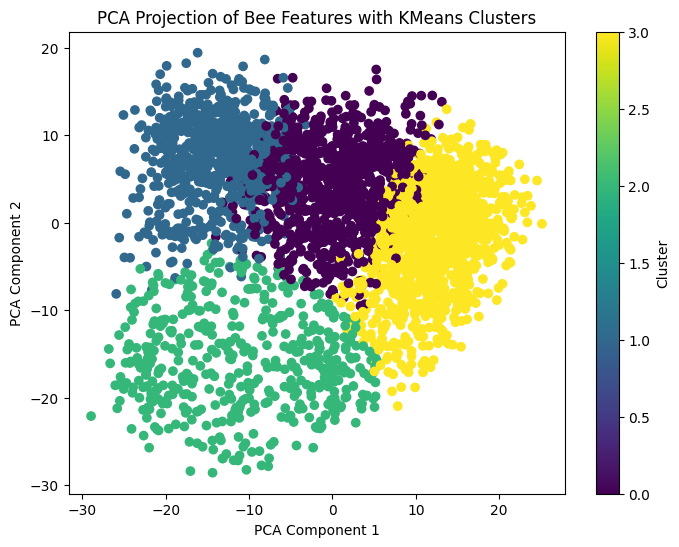

In [9]:
features = np.array(feature_list)
# TODO: This clustering needs more explanation as well as the meaning f it?
'''
TODO:
Training a model to figure out what cluster refers to what. Tho this part is mostly about bee research so I am not sure about that part
After the features are seperated, need to train multiple models on it or apply ViT to it for action recognition on real time.
'''
# Step 1: Dimensionality reduction for visualization (2 components)
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

# Step 2: Cluster the features using KMeans (e.g., 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(features)

print("Cluster labels:", clusters)

# Step 3: Visualize the clusters
plt.figure(figsize=(8,6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters, cmap='viridis')
plt.title("PCA Projection of Bee Features with KMeans Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()